# Relax Challange

## Project Description 


Defining  an  `adopted user`   as  a  user  *who   has  logged  into  the  product  on  three  separate days  in  at  least  one  seven­day  period* ,  **identify  which  factors  predict  future  user adoption**.

We  suggest  spending  1­2  hours  on  this,  but  you're  welcome  to  spend  more  or  less. Please  send  us  a  brief  writeup  of  your  findings  (the  more  concise,  the  better  ­­  no  more than  one  page),  along  with  any  summary  tables,  graphs,  code,  or  queries  that  can  help us  understand  your  approach.  Please  note  any  factors  you  considered  or  investigation you  did,  even  if  they  did  not  pan  out.  Feel  free  to  identify  any  further  research  or  data you  think  would  be  valuable


## Data description

The  data  is  available  as  two  attached  CSV  files:
- `takehome_user_engagement_df. csv`
- `takehome_user.csv`

The  data  has  the  following  two  tables:
The  data  has  the  following  two  tables:

1. A  user  table  ( "takehome_user" )  with  data  on  12,000  user  who  signed  up  for  the product  in  the  last  two  years. This  table  includes:
     - `name`:  the  user's  name
     - `object_id`:   the  user's  id
     - `email`:  email  address
     - `creation_source`:   how  their  account  was  created.  This  takes  on  one of  5  values:
        - `PERSONAL_PROJECTS`:  invited  to  join  another  user's personal  workspace
        - `GUEST_INVITE`:  invited  to  an  organization  as  a  guest (limited  permissions)
        - `ORG_INVITE`:  invited  to  an  organization  (as  a  full  member)
        - `SIGNUP`:  signed  up  via  the  website
        - `SIGNUP_GOOGLE_AUTH`:  signed  up  using  Google Authentication  (using  a  Google  email  account  for  their  loginid)
    - `creation_time`:  when  they  created  their  account
    - `last_session_creation_time`:   unix  timestamp  of  last  login
    - `opted_in_to_mailing_list`:  whether  they  have  opted  into  receiving marketing  emails
    - `enabled_for_marketing_drip`:  whether  they  are  on  the  regular marketing  email  drip
    - `org_id`:   the  organization  (group  of  user)  they  belong  to
    - `nvited_by_user_id`:   which  user  invited  them  to  join  (if  applicable).
    
<b></b>
    
2. A  usage  summary  table  ( "takehome_user_engagement_df" )  that  has  a  row  for  each  day that  a  user  logged  into  the  product.


# 1. Problem Definition

- Identify factors that predict future user adoption
- An adopted user as one who has logged into the product on 3 separate days in at least one 7-day period. 

# 2. Data Collection

## Installations 

In [1]:
'''Install required packages'''
#!pip install ppscore
#!pip install pycaret==2.3.4
#!pip install chardet

'''Install compatibale vesion of scikit-learn'''
#!pip install -U scikit-learn
#!pip install scikit-learn==0.23.2

'Install compatibale vesion of scikit-learn'

## Import Libraries

In [2]:
#Fundamental libraries
import numpy as np 
import pandas as pd 

#Plot libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Missing data vizualization libraries
import missingno as msno
import ppscore as pps

# read data
import os 
import json


## Utility Functions

In [3]:
def json_url_to_df (url):
    '''Read json url to df'''

    import urllib.request

    response = urllib.request.urlopen(url)
    data = response.read().decode()
    json_data = json.loads(data)

    df = pd.DataFrame(json_data)

    return df

In [4]:
def json_file_to_df(directory, file_name):
  
    '''Read json url to df'''
    # Change directory one step back and save as the root directory
    root_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
    print(root_dir)

    # Define the location of data directory
    path = root_dir + '\\data\\'

    # Set the file name
    json_data = path + 'ultimate_data_challenge.json'

    #Read JSON file into a dataframe: df
    df = pd.DataFrame(json_data)

    return df

In [5]:
def csv_url_to_df(url):
    '''Read csv file from url to df'''
    import requests
    import chardet

    response = requests.get(url)
    encoding = chardet.detect(response.content)['encoding']
    df = pd.read_csv(url, encoding=encoding)

    return df

## Read Data

In [6]:
## Read json url to df
#url = "https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/1.%20ultimate_challenge/data/ultimate_data_challenge.json"
#df = json_url_to_df(url)

In [7]:
## Read json file to df
#directory = '\\data\\'
#file_name = 'ultimate_data_challenge.json'
#df = json_file_to_df(directory, file_name)

In [8]:
#Read csv from url to df
url_1 = 'https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/2.%20relax_challenge/Data/takehome_user_engagement.csv'
url_2 = 'https://raw.githubusercontent.com/faridjn/Springboard/master/Unit%2027%20-%20Interview%20Challanges/2.%20relax_challenge/Data/takehome_users.csv'

engagement_df = csv_url_to_df(url_1)
user_df = csv_url_to_df(url_2)

# 3. Data Wrangling

## Utility functions

In [9]:
def describe_dataframe(df):
    print('Describe non-numeric columns:')
    display(df.describe(include = ['O', 'bool']).round(2).T)
    
    print('\nDescribe numeric columns:')
    display(df.describe().round(2).T)
    
    return None

In [10]:
#Missing data helper function
def count_missing(df):
    ''' Count the number of missing values .isnull() in each column well as the percentages 
    Call pd.concat() to form a single table df with 'count' and '%' columns'''
    
    print('\nMissing data stasts')
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns=['count', '%']
    missing = missing.loc[missing['count'] > 0]
    missing.sort_values(by='count', inplace = True, ascending = False)
    
    return missing

## Data inspection and exploration

In [11]:
#Check size of the dataframe
print(engagement_df.shape)

#Check size of the dataframe
print(user_df.shape)

(207917, 3)
(12000, 10)


In [12]:
#Display top 10 rows of the df
display('engagement_df', engagement_df.head(10))
print('')
display('user_df', user_df.head(3).T)

'engagement_df'

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


'user_df'

,0,1,2
object_id,1,2,3
creation_time,2014-04-22 03:53:30,2013-11-15 03:45:04,2013-03-19 23:14:52
name,Clausen August,Poole Matthew,Bottrill Mitchell
email,AugustCClausen@yahoo.com,MatthewPoole@gustr.com,MitchellBottrill@gustr.com
creation_source,GUEST_INVITE,ORG_INVITE,ORG_INVITE
last_session_creation_time,1398138810.0,1396237504.0,1363734892.0
opted_in_to_mailing_list,1,0,0
enabled_for_marketing_drip,0,0,0
org_id,11,1,94
invited_by_user_id,10803.0,316.0,1525.0


In [13]:
#print data types
engagement_df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [14]:
#print data types
user_df.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [15]:
#Number of unique user
engagement_df['user_id'].nunique()

8823

In [16]:
# Unique objects and number of unique objects
print_unique = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
count_unique = ['object_id', 'name', 'email', 'invited_by_user_id']

In [17]:
for col in count_unique:
    print(col, ':', user_df[col].nunique())

object_id : 12000
name : 11355
email : 11980
invited_by_user_id : 2564


In [18]:
for col in print_unique:
    print(col, ':', list(user_df[col].unique()))

creation_source : ['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS', 'SIGNUP_GOOGLE_AUTH']
opted_in_to_mailing_list : [1, 0]
enabled_for_marketing_drip : [0, 1]


## Handling of missing data

In [19]:
# missing data stats
count_missing(user_df)


Missing data stasts


,count,%
invited_by_user_id,5583,46.525
last_session_creation_time,3177,26.475


In [20]:
# Replace NaN values with a default value, e.g. -1
user_df['last_session_creation_time'].fillna(0, inplace=True)

In [21]:
# Replace NaN values with a default value 0
user_df['invited_by_user_id'].fillna(-1, inplace=True)

In [22]:
# missing data stats
count_missing(user_df)


Missing data stasts


,count,%


In [23]:
# missing data stats
count_missing(engagement_df)


Missing data stasts


,count,%


## Feature engineering

### Date formatting

In [24]:
# Set datetime formt used in the dataset
datetime_format = '%Y-%m-%d %H:%M:%S'

#Change `date_columns` coluumn data type to `datetime`
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'], format=datetime_format, errors="raise")
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'], format=datetime_format, errors="raise")
user_df['last_session_creation_time'] = pd.to_datetime(user_df['last_session_creation_time'], unit='s')

### Add `adopted_use` feature

In [25]:
def adopted_user_checker(df, days=7, logins=3):
    '''Define a function to see if a user logged in on 3 seperate days in a 7-day period.'''
    #imports
    from datetime import timedelta
    
    #extract date
    df['time_stamp'] = pd.to_datetime(df['time_stamp'])
    df['date'] = df['time_stamp'].dt.date
    
    # first drop duplicate days and sort by day
    df = df.drop_duplicates(subset='date').sort_values('date')
    
    # calculate how many days has passed for every 3 logins
    passed_days = df['date'].diff(periods=logins-1)
    
    # check if any passed time is less than 7 days
    adopted = any(passed_days <= timedelta(days=days))
    
    return adopted

In [26]:
# run the function on all users
adopted = engagement_df.groupby('user_id').apply(adopted_user_checker)

In [27]:
#pass series to a dataframe and name `adapter_user`
adopted_df = pd.DataFrame(adopted)
adopted_df.columns = ['adapted_user']
adopted_df.reset_index(drop=False, inplace=True)
adopted_df.head()

,user_id,adapted_user
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [28]:
count_adopted_users = adopted_df['adapted_user'].sum()
count_total_users = len(adopted_df)
adoption_ratio = 100*count_adopted_users/count_total_users
print('count adopted users :', count_adopted_users)
print('count total users :', count_total_users)
print(f'adoption ratio : {adoption_ratio:.2f}%')

count adopted users : 1656
count total users : 8823
adoption ratio : 18.77%


### Create new feature as `by_invitation`

In [29]:
# Convert float column A to integer type
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].astype(int)

In [30]:
# create a new column 'by_invitation' based on the values of the 'invited_by_user_id' column
user_df['by_invitation'] = np.where(user_df['invited_by_user_id'] == -1, 0, 1)

### New feature to count activity days

In [31]:
#Find the max date value in last session
last_date = max(user_df['last_session_creation_time'])

user_df['days_since_creation'] = (last_date - user_df['creation_time']).dt.days
user_df['days_last_session'] = (last_date - user_df['last_session_creation_time']).dt.days

### Join dataframes

In [32]:
df = pd.merge(user_df, adopted_df, left_on='object_id', right_on='user_id')

In [33]:
df.sample(1).T

,7302
object_id,9946
creation_time,2014-04-23 11:41:18
name,Möller Kerstin
email,xwqmndcc@dihjz.com
creation_source,SIGNUP
last_session_creation_time,2014-04-27 11:41:18
opted_in_to_mailing_list,1
enabled_for_marketing_drip,0
org_id,18
invited_by_user_id,-1


### Final data cleaning

In [34]:
#define columns to drop
columns_to_drop = ['creation_time', 'name', 'email', 'last_session_creation_time', 'user_id']

In [35]:
#drop columns
df.drop(columns=columns_to_drop, inplace=True)

In [36]:
#rename `object_id` to `user_id`
df = df.rename(columns={'object_id':'user_id'})

# 4. Exploratory Data Analysis (EDA):

## Categorize features

In [37]:
#check
df.sample(1).T

,5286
user_id,7225
creation_source,PERSONAL_PROJECTS
opted_in_to_mailing_list,0
enabled_for_marketing_drip,0
org_id,257
invited_by_user_id,-1
by_invitation,0
days_since_creation,141
days_last_session,139
adapted_user,False


In [38]:
#define numerical columns
NUM_FEATURES = ['days_since_creation', 'days_last_session']

#define categorical columns
CAT_FEATURES = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip','by_invitation']

#define target feature
TARGET_FEATURE = 'adapted_user'

#define trivial targets
TRIVIAL_FEATURES = ['user_id', 'org_id', 'invited_by_user_id']

## Plots

### Histograms

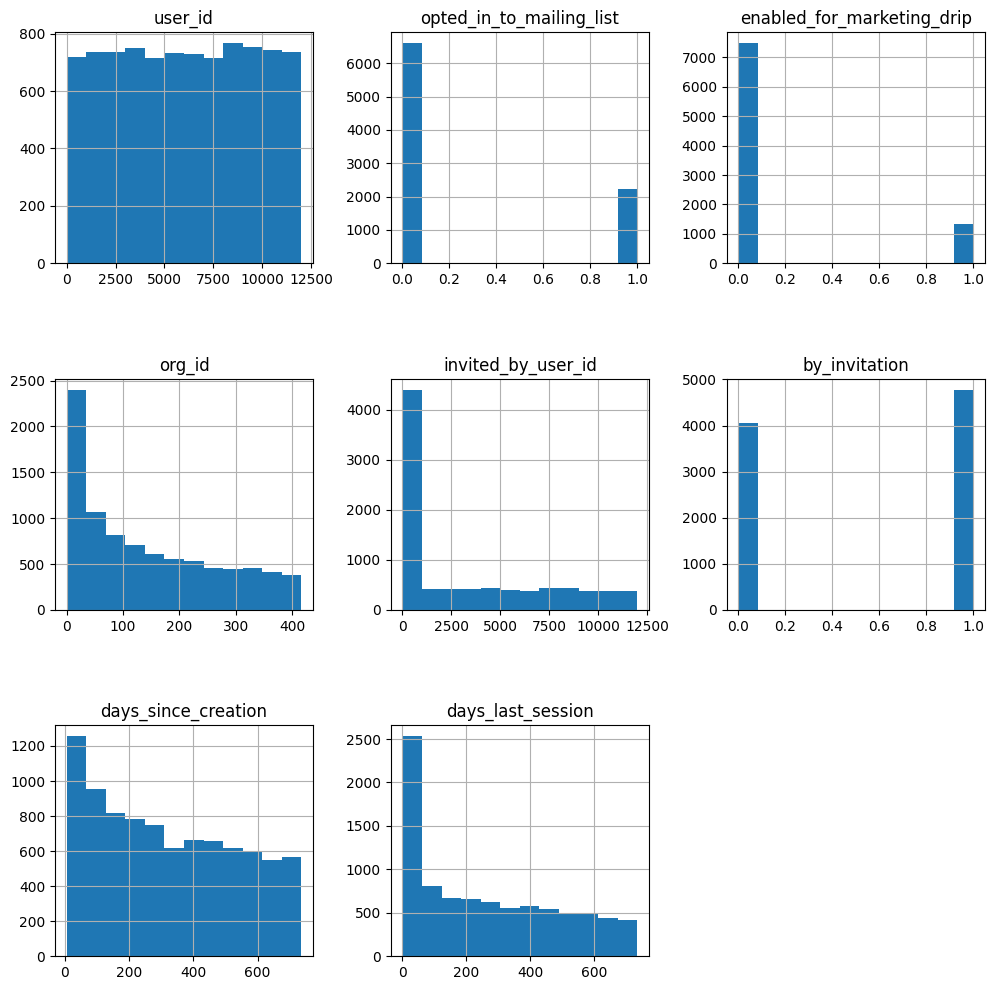

In [39]:
#Plot histogram of all features
df.hist(figsize=(12,12), bins = 12)
plt.subplots_adjust(hspace=0.5)

### Plot referrals by users

In [40]:
#Count referrals by users
referred_by_df = pd.DataFrame(df['invited_by_user_id'].value_counts())
referred_by_df = referred_by_df.reset_index()
referred_by_df.columns = ['user_id', 'conut']

In [41]:
print('\nNumber of users joined without referrals:')
referred_by_df.loc[[0]]


Number of users joined without referrals:


,user_id,conut
0,-1,4047


In [42]:
#drop users without referrals
user_referral_df_plot = referred_by_df.drop([0], axis=0)
user_referral_df_plot.head()

,user_id,conut
1,4612,10
2,11770,9
3,2308,9
4,730,8
5,3261,8


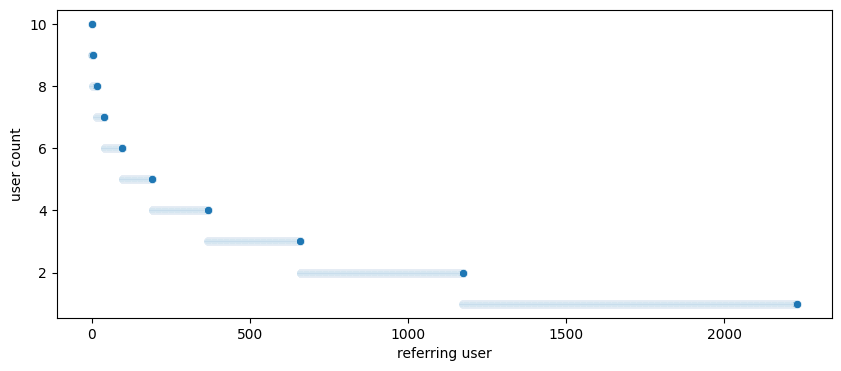

In [43]:
plt.figure(figsize=(10,4))

sns.scatterplot(data=user_referral_df_plot,
                x=user_referral_df_plot.index,
                y='conut')

plt.xlabel('referring user')
plt.ylabel('user count')
plt.show()

### Plot count of users per organization 

In [44]:
#Count users in organizations
org_id_df = pd.DataFrame(df['org_id'].value_counts())
org_id_df = org_id_df.reset_index()
org_id_df.columns = ['org_id', 'conut']

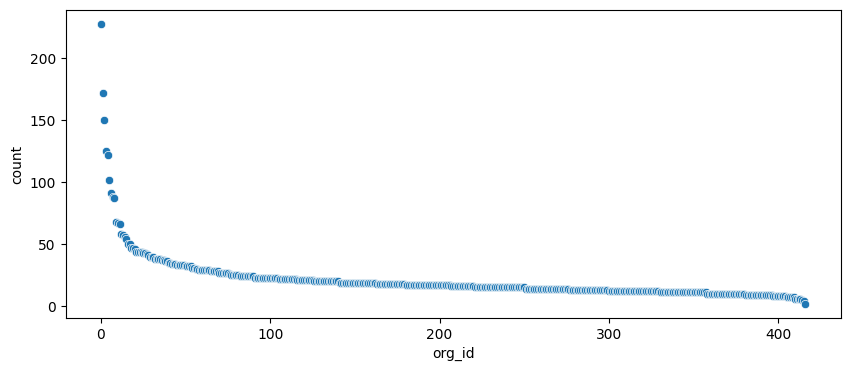

In [45]:
plt.figure(figsize=(10,4))

sns.scatterplot(data=org_id_df,
                x=org_id_df.index,
                y='conut')

plt.xlabel('org_id')
plt.ylabel('count')
plt.show()

Define Categorical vs numerical features

## Categorical Features

### Stats

In [46]:
#create a pivot table for categorical columns
dfg_cat = pd.DataFrame(df.groupby(TARGET_FEATURE)[CAT_FEATURES].sum(numeric_only=True)).reset_index()
display(dfg_cat)

# metlt the pivot table to plotable features
dfg_cat_melt = pd.melt(dfg_cat, id_vars = [TARGET_FEATURE], var_name='Feature', value_name = 'Count')
display(dfg_cat_melt)

,adapted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,by_invitation
0,False,1797,1084,3833
1,True,429,257,943


,adapted_user,Feature,Count
0,False,opted_in_to_mailing_list,1797
1,True,opted_in_to_mailing_list,429
2,False,enabled_for_marketing_drip,1084
3,True,enabled_for_marketing_drip,257
4,False,by_invitation,3833
5,True,by_invitation,943


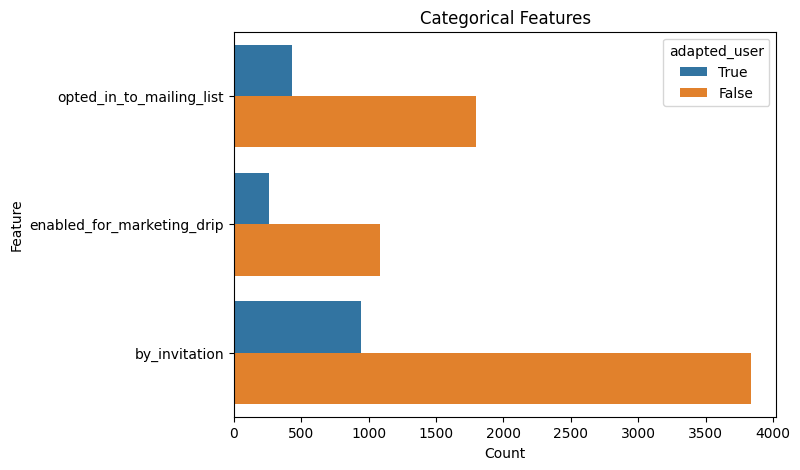

In [47]:
# Set the hue for the 'active' column
hue_order = [True, False]

#Plot the `dfg_melt`
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=dfg_cat_melt, y='Feature', x='Count', hue = TARGET_FEATURE, hue_order=hue_order)
plt.title('Categorical Features')
plt.show()

### Pairplots

In [48]:
df[CAT_FEATURES].sample(1).T

,1421
creation_source,ORG_INVITE
opted_in_to_mailing_list,0
enabled_for_marketing_drip,0
by_invitation,1


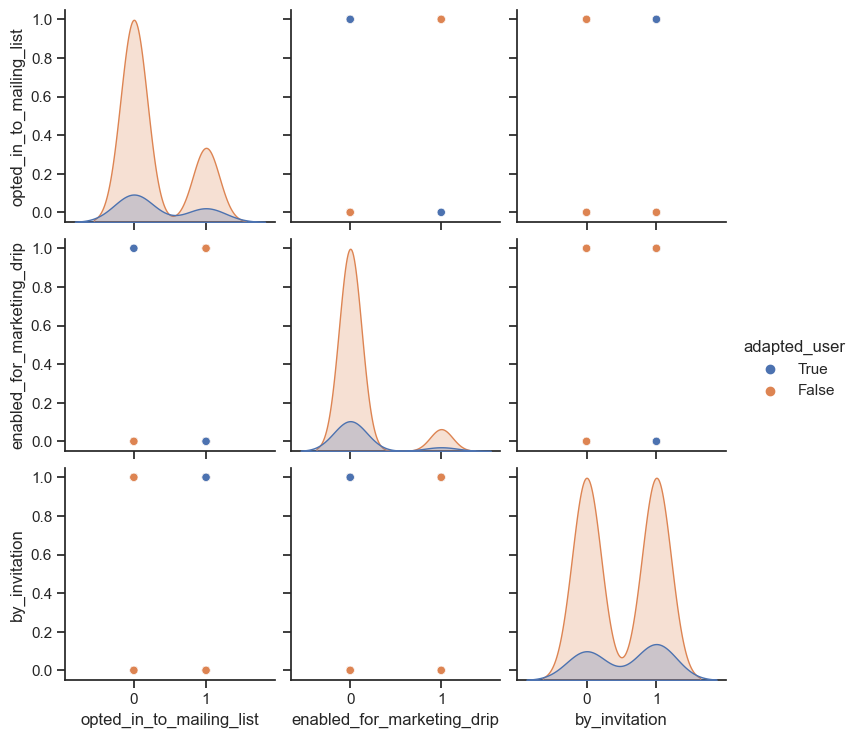

In [49]:
df_plot = df.sample(100)

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the hue for the 'active' column
hue_order = [True, False]


# List of columns to exclude
exclude_cols = ['creation_source'] + NUM_FEATURES + TRIVIAL_FEATURES

# Create a new DataFrame without the excluded columns
included_cols = [col for col in df_plot.columns if col not in exclude_cols]
df_plot_included = df_plot[included_cols]

# Plot histograms of numerical columns
g = sns.pairplot(df_plot_included, diag_kind="kde", hue=TARGET_FEATURE, hue_order=hue_order)
plt.show()

## Numerical Features

### Boxplots

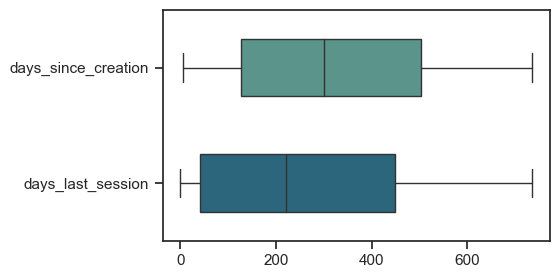

In [50]:
fig, ax = plt.subplots(figsize=(5,3))

sns.boxplot(data = df[NUM_FEATURES],
            orient = 'h',
            width=0.5,
            palette='crest',
            linewidth= 1,
            sym = '')
plt.show()

### Pairplot

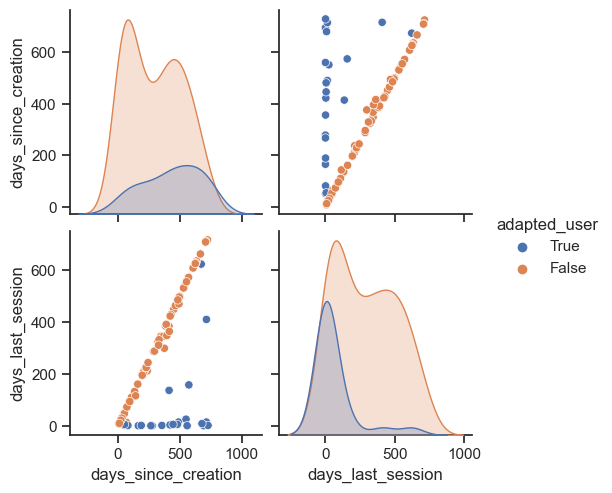

In [51]:
df_plot = df.sample(100)

# Set the style of the plots
sns.set(style="ticks", color_codes=True)

# Set the hue for the 'active' column
hue_order = [True, False]

# Plot histograms of numerical columns
g = sns.pairplot(df_plot, diag_kind="kde", hue=TARGET_FEATURE, vars = NUM_FEATURES, hue_order=hue_order)
plt.show()

### Stats

In [52]:
#seperate active and disactive
df_target_num = df[NUM_FEATURES].loc[df[TARGET_FEATURE] == 1]
df_non_target_num = df[NUM_FEATURES].loc[df[TARGET_FEATURE] != 1]

In [53]:
#Calcualte stats 
#Feature 
df_target_describe= df_target_num.describe().loc[['count', 'mean', 'std']].T
df_target_describe['cv'] = df_target_describe['std']/df_target_describe['mean']
df_target_describe[TARGET_FEATURE] = 1

#Non-Target Feature 
df_non_target_describe= df_non_target_num.describe().loc[['count', 'mean', 'std']].T
df_non_target_describe['cv'] = df_non_target_describe['std']/df_non_target_describe['mean']
df_non_target_describe[TARGET_FEATURE] = 0

In [54]:
#Concat stat tables
df_num_describe = pd.concat([df_target_describe,df_non_target_describe],axis = 0)

display(df_num_describe)

,count,mean,std,cv,adapted_user
days_since_creation,1656.0,371.248188,202.624912,0.545794,1
days_last_session,1656.0,78.740338,155.313460,1.972476,1
days_since_creation,7167.0,311.195061,217.421657,0.698667,0
days_last_session,7167.0,305.875680,218.300480,0.713690,0


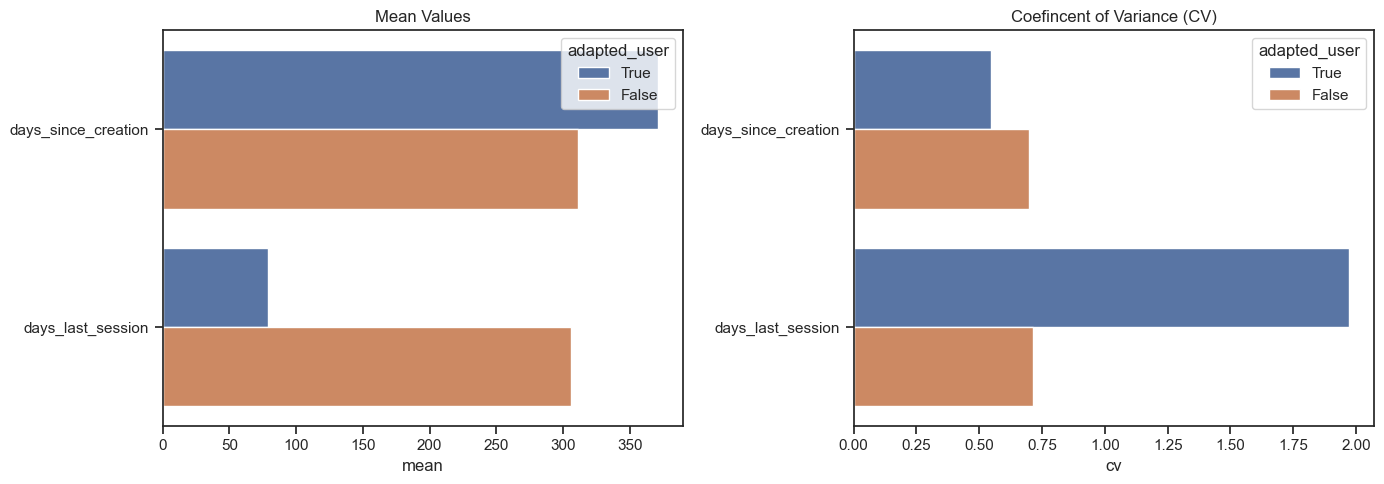

In [55]:
# Set the hue for the 'feature' column
hue_order = [True, False]

#Plot the stats
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

#plot mean values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'mean',
            hue = TARGET_FEATURE,
            hue_order = hue_order,
            ax=axes[0])
axes[0].set_title('Mean Values')

#plot cv values
sns.barplot(data = df_num_describe,
            y = df_num_describe.index,
            x = 'cv',
            hue = TARGET_FEATURE,
            hue_order = hue_order,
            ax=axes[1])
axes[1].set_title('Coefincent of Variance (CV)')

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [56]:
def plot_corr_matrix (df, round_vals, mask = True):
    '''This function plots Correlation matrix'''
    
    # Compute the correlation matrix
    corr = df.corr(numeric_only  = True)
        
    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 5))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr.round(round_vals), mask=mask, cmap='coolwarm', vmin = -1, vmax=1, center=0, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title='Pearson Correlation Matrix')

    plt.show()

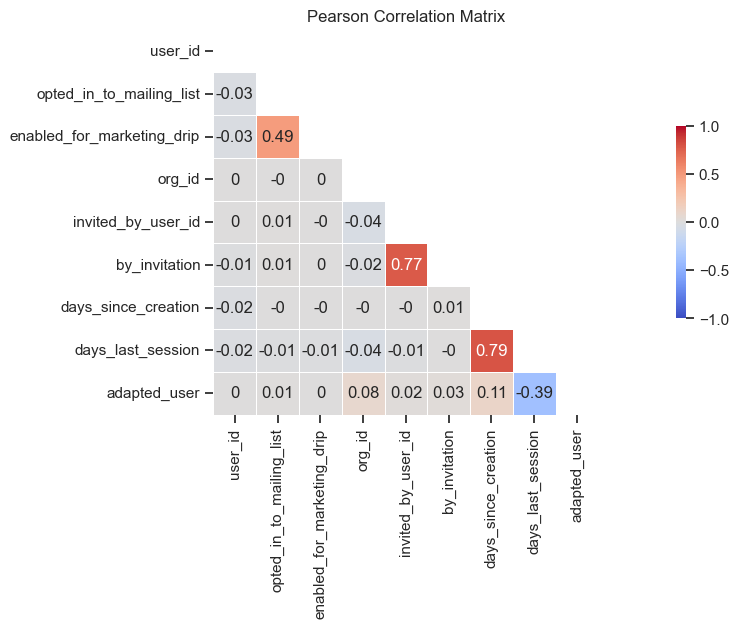

In [57]:
#Plot Corr matrix
plot_corr_matrix(df=df, round_vals=2, mask = True)

In [58]:
def plot_pps_matrix(df, round_vals=2, mask = True):
    '''This function gets a df and plot PPS score matrix'''
    
    # Compute the PPS matrix
    matrix = pps.matrix(df)

    #Plot PPS
    matrix_pps = matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

    # Generate a mask for the upper triangle
    if mask:
        mask = np.triu(np.ones_like(matrix_pps, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 5))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(matrix_pps.round(round_vals), mask = mask, cmap="Blues", vmin = 0, vmax=1, center=0.5,
                square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5}).set(title='PPS Matrix')
    plt.show()


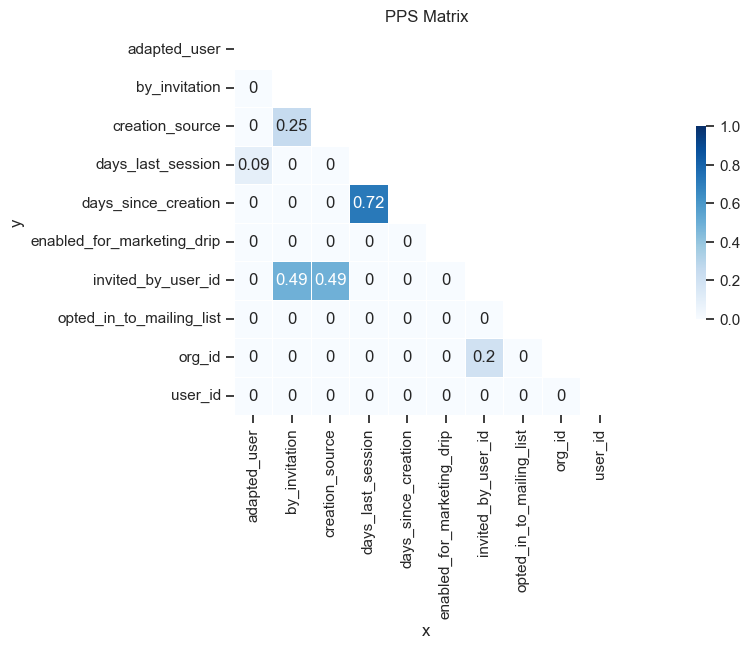

In [59]:
    #Plot PPS
plot_pps_matrix(df=df, round_vals=2, mask=True)

# 5. Model Building

## Import libraries

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

## Pre-processing

### Drop trivial columns

In [61]:
#drop trivial columns
data = df.drop(columns=TRIVIAL_FEATURES)
display(data.sample(1).T)

,4107
creation_source,SIGNUP
opted_in_to_mailing_list,0
enabled_for_marketing_drip,0
by_invitation,0
days_since_creation,709
days_last_session,10
adapted_user,True


### One hot encoding

In [62]:
# Select columns to be one-hot encoded
columns_to_encode = ['creation_source']

# Apply one-hot encoding
one_hot_encoded = pd.get_dummies(data, columns=columns_to_encode)

In [63]:
one_hot_encoded.dtypes

opted_in_to_mailing_list              int64
enabled_for_marketing_drip            int64
by_invitation                         int32
days_since_creation                   int64
days_last_session                     int64
adapted_user                           bool
creation_source_GUEST_INVITE          uint8
creation_source_ORG_INVITE            uint8
creation_source_PERSONAL_PROJECTS     uint8
creation_source_SIGNUP                uint8
creation_source_SIGNUP_GOOGLE_AUTH    uint8
dtype: object

In [64]:
one_hot_encoded.sample(1).T

,8410
opted_in_to_mailing_list,0
enabled_for_marketing_drip,0
by_invitation,1
days_since_creation,385
days_last_session,385
adapted_user,False
creation_source_GUEST_INVITE,1
creation_source_ORG_INVITE,0
creation_source_PERSONAL_PROJECTS,0
creation_source_SIGNUP,0


### Define X, y sets

In [65]:
#Separate the input features and target variable:
X = one_hot_encoded.loc[:, one_hot_encoded.columns != TARGET_FEATURE]
y = one_hot_encoded.loc[:, one_hot_encoded.columns == TARGET_FEATURE].iloc[:,0]

In [66]:
print(X.columns)
X.shape

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip',
       'by_invitation', 'days_since_creation', 'days_last_session',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH'],
      dtype='object')


(8823, 10)

In [67]:
y.shape

(8823,)

### Train-test split

In [68]:
#Split the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Initialize Model

In [69]:
#Create an instance of the logistic regression model:
model = LogisticRegression()

## Hyper-parameterization

In [70]:
#ignore warning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)


#Define the hyperparameters and their search space:
param_grid = {'penalty': ['l2'],
              'C': [0.001, 0.01, 0.1],
              'solver': ['lbfgs','newton-cg'], 
              'max_iter': [100, 500]}


#Create an instance of the GridSearchCV object:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

#Perform the GridSearchCV on the training data:
grid_search.fit(X_train, y_train)

#Print the best hyperparameters:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


# 6. Model Deployment

In [71]:
#Make predictions on the testing data using the best hyperparameters:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

In [72]:
#Evaluate the model's performance:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2109   27]
 [  70  441]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      2136
        True       0.94      0.86      0.90       511

    accuracy                           0.96      2647
   macro avg       0.96      0.93      0.94      2647
weighted avg       0.96      0.96      0.96      2647



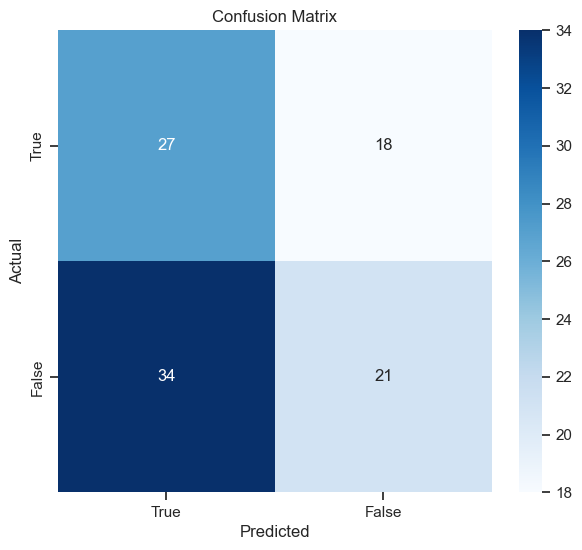

In [73]:
# Generate some example data
y_true = np.random.randint(0, 2, size=100)
y_pred = np.random.randint(0, 2, size=100)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

#classes
class_labels = ['True', 'False']

fig, ax = plt.subplots(figsize=(7,6))

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


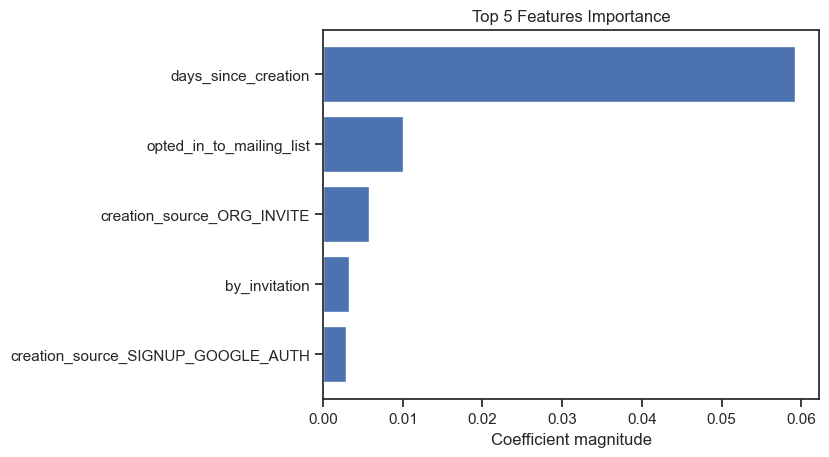

In [74]:
#Report the feature importance:
coef = model.coef_.ravel()
top_coef = np.argsort(coef)[-5:]
feature_names = np.array(X.columns)
plt.barh(feature_names[top_coef], coef[top_coef])
plt.xlabel("Coefficient magnitude")
plt.title("Top 5 Features Importance")
plt.show()

# 7. Communication of Results

The `days_since_creation` and `opted_in_to_mailing_list` are the most important features